In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Datasets and Preprocessing**

#### Analysis of recovered cases in World and India

In [ ]:
#Recovered Cases in World and India

world_covid_recovered=pd.read_csv('/content/time_series_covid19_recovered_global1.csv')
world_covid_recovered.drop(columns=['Province/State','Lat','Long'],inplace=True)
India_covid_recovered=world_covid_recovered[world_covid_recovered['Country/Region']=='India']
print(India_covid_recovered)
world_covid_recovered

    Country/Region  1/22/20  1/23/20  ...  7/13/20  7/14/20  7/15/20
125          India        0        0  ...   571460   592032   612768

[1 rows x 177 columns]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68,68,68,76,135,146,156,176,177,177,182,188,191,199,203,203,203,208,211,214,219,219,219,235,236,252,260,267,267,268,269,279,283,283,284,284,286,286,286,322
249,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,28,39,53,79,91,271,273,288,328,347,350,356,379,386,402,417,430,432,488,504,513,536,537,552,575,591,595,619,630,642,659,675,685,694
250,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67,67,67,67,97,97,97,114,114,114,127,127,129,129,159,159,159,159,159,161,161,161,161,161,200,200,200,241,241,266,266,266,272,272,272,296,296,296,302,302
251,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2583,2673,2763,2815,2947,3062,3158,3288,3409,3503,3624,3700,3762,3830,3894,3995,4039,4109,4194,4267,4331,4391,4448,4506,4506,4627,4690,4690,4809,4858,4914,4965,5011,5067,5115,5176,5228,5278,5332,5383


In [ ]:
#columns

cols=world_covid_recovered.keys()
cols=cols[1:]
cols

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20'],
      dtype='object', length=176)

In [ ]:
#Access all No.of Recovered Cases daily in World

world_recovered=[]
cov_recovered=world_covid_recovered.values
for i in range(1,len(cols)+1):
  world_recovered.append(cov_recovered[:,i].sum())
world_recovered=np.array(world_recovered).reshape(-1,1)
world_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58359],
       [  60694],
       [  62493],
       [  64404],
       [  67002],
       [  68323],
       [  70250],
       [  72621],
       [  76031],
       [  78085],
       [  

In [ ]:
#Access all Recovered Cases Daily in India

India_recovered=[]
ind_recovered=world_covid_recovered[world_covid_recovered['Country/Region']=='India'].values
for i in range(1,len(cols)+1):
  India_recovered.append(ind_recovered[:,i].sum())
India_recovered=np.array(India_recovered).reshape(-1,1)
India_recovered

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     4],
       [     4],
       [     4],
       [     4],
       [     4],
       [    13],
       [    13],
       [    14],
       [    14],
       [    15],
       [    20

In [ ]:
#Days

days = np.array([i for i in range(len(world_recovered))]).reshape(-1, 1)
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
#Converting Dates

dates=pd.to_datetime(cols)
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', length=176, freq=None)

**Graphs**

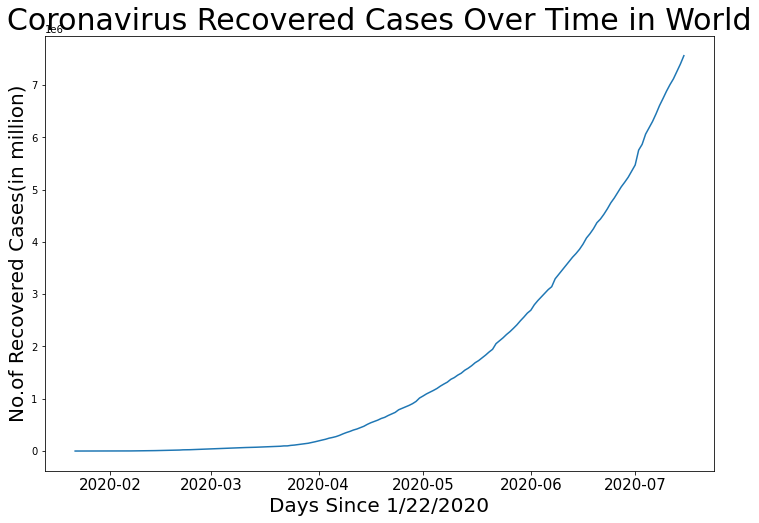

In [ ]:
#Graph for Recovered Cases in World

plt.figure(figsize=(12, 8))
plt.plot(dates,world_recovered)
plt.title('Coronavirus Recovered Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Recovered Cases(in million)', size=20)
plt.xticks(size=15)
plt.show()

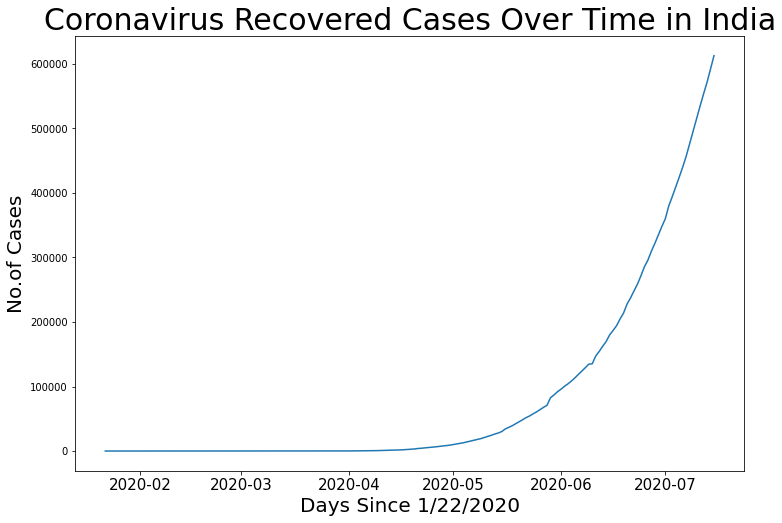

In [ ]:
#Graph for Recovered Cases in India

plt.figure(figsize=(12, 8))
plt.plot(dates,India_recovered)
plt.title('Coronavirus Recovered Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases', size=20)
plt.xticks(size=15)
plt.show()

#Prediction

In [ ]:
days_in_future = 15
prediction_days = np.array([i for i in range(len(days)+days_in_future)]).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
prediction_dates = []
for i in range(len(prediction_days)):
    prediction_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
prediction_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [ ]:
xtrain_world_recovered,xtest_world_recovered,ytrain_world_recovered,ytest_world_recovered=train_test_split(days,world_recovered,test_size=0.35)
xtrain_ind_recovered,xtest_ind_recovered,ytrain_ind_recovered,ytest_ind_recovered=train_test_split(days,India_recovered,test_size=0.35)

In [ ]:
#Linear Regression

# World
lmodel_world_recovered=LinearRegression()
lmodel_world_recovered.fit(xtrain_world_recovered,ytrain_world_recovered)
lmodel_world_recovered_test=lmodel_world_recovered.predict(xtest_world_recovered)
lmodel_world_recovered_predict=lmodel_world_recovered.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(lmodel_world_recovered_test, ytest_world_recovered))
print('MSE:',metrics.mean_squared_error(lmodel_world_recovered_test,ytest_world_recovered))
print('R2 :',metrics.r2_score(lmodel_world_recovered_test,ytest_world_recovered))
print('Training score:',lmodel_world_recovered.score(xtrain_world_recovered,ytrain_world_recovered))
print('Testing score:',lmodel_world_recovered.score(xtest_world_recovered,ytest_world_recovered))
print('Co-efficient:',lmodel_world_recovered.coef_)
print('Intercept:',lmodel_world_recovered.intercept_)

MAE: 758396.7321050029
MSE: 834571442610.5636
R2 : 0.7731514930717013
Training score: 0.7728618795611027
Testing score: 0.8026338354071084
Co-efficient: [[37073.12317947]]
Intercept: [-1602444.01670625]


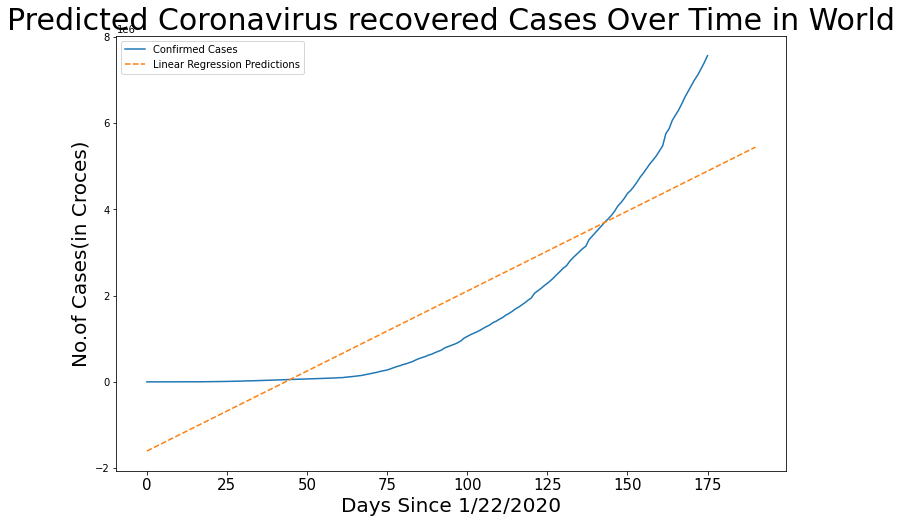

In [ ]:
#Graph for Linear Predicted Recovered Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_recovered)
plt.plot(prediction_days,lmodel_world_recovered_predict,linestyle='dashed')
plt.title('Predicted Coronavirus recovered Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
lmodel_world_recovered_predict = lmodel_world_recovered_predict.reshape(1,-1)[0]
df_world_recovered_linear_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Linear Regression Predicted # of Recovered Cases Worldwide': np.round(lmodel_world_recovered_predict[-(days_in_future):])})
df_world_recovered_linear_predict

,Date,Linear Regression Predicted # of Recovered Cases Worldwide
0,07/16/2020,4922426.0
1,07/17/2020,4959499.0
2,07/18/2020,4996572.0
3,07/19/2020,5033645.0
4,07/20/2020,5070718.0
5,07/21/2020,5107791.0
6,07/22/2020,5144864.0
7,07/23/2020,5181938.0
8,07/24/2020,5219011.0
9,07/25/2020,5256084.0


In [ ]:
# India
lmodel_ind_recovered=LinearRegression()
lmodel_ind_recovered.fit(xtrain_ind_recovered,ytrain_ind_recovered)
lmodel_ind_recovered_test=lmodel_ind_recovered.predict(xtest_ind_recovered)
lmodel_ind_recovered_predict=lmodel_ind_recovered.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(lmodel_ind_recovered_test, ytest_ind_recovered))
print('MSE:',metrics.mean_squared_error(lmodel_ind_recovered_test,ytest_ind_recovered))
print('R2 :',metrics.r2_score(lmodel_ind_recovered_test,ytest_ind_recovered))
print('Training score:',lmodel_ind_recovered.score(xtrain_ind_recovered,ytrain_ind_recovered))
print('Testing score:',lmodel_ind_recovered.score(xtest_ind_recovered,ytest_ind_recovered))
print('Co-efficient:',lmodel_ind_recovered.coef_)
print('Intercept:',lmodel_ind_recovered.intercept_)

MAE: 77681.81457950406
MSE: 9117675254.466692
R2 : 0.21728268231905845
Training score: 0.5739509240130347
Testing score: 0.5560003798149407
Co-efficient: [[2185.75645449]]
Intercept: [-105623.92719871]


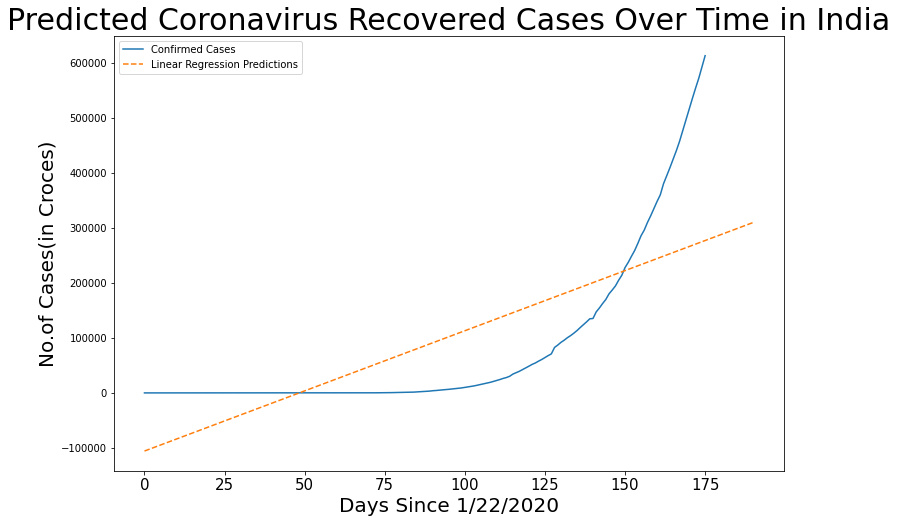

In [ ]:
#Graph for Linear Predicted recoevred Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_recovered)
plt.plot(prediction_days,lmodel_ind_recovered_predict,linestyle='dashed')
plt.title('Predicted Coronavirus Recovered Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
#Prediction in India
lmodel_ind_recovered_predict = lmodel_ind_recovered_predict.reshape(1,-1)[0]
df_ind_recovered_linear_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Linear Regression Predicted # of recovered Cases in India': np.round(lmodel_ind_recovered_predict[-(days_in_future):])})
df_ind_recovered_linear_predict

,Date,Linear Regression Predicted # of recovered Cases in India
0,07/16/2020,279069.0
1,07/17/2020,281255.0
2,07/18/2020,283441.0
3,07/19/2020,285626.0
4,07/20/2020,287812.0
5,07/21/2020,289998.0
6,07/22/2020,292184.0
7,07/23/2020,294370.0
8,07/24/2020,296555.0
9,07/25/2020,298741.0


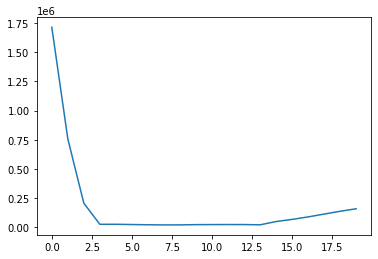

In [ ]:
#Polynomial Regression
#Best degreee = 3

#World

error_recovered=[]
for i in range(0,20):
  pol=PolynomialFeatures(degree=i)
  pol_world_recovered=pol.fit_transform(xtrain_world_recovered)
  pol_world_recovered_test=pol.fit_transform(xtest_world_recovered)
  lmodel=LinearRegression()
  lmodel.fit(pol_world_recovered,ytrain_world_recovered)
  pol_world_recovered_predict=lmodel.predict(pol_world_recovered_test)
  e=metrics.mean_absolute_error(pol_world_recovered_predict,ytest_world_recovered)
  error_recovered.append(e)
plt.plot(range(0,20),error_recovered)
plt.show()

In [ ]:
pol=PolynomialFeatures(degree=3)
pol_world_recovered=pol.fit_transform(xtrain_world_recovered)
pol_world_recovered_test=pol.fit_transform(xtest_world_recovered)
pol_world_recovered_predict_days=pol.fit_transform(prediction_days)
pmodel=LinearRegression()
pmodel.fit(pol_world_recovered,ytrain_world_recovered)
pol_world_recovered_predict=pmodel.predict(pol_world_recovered_test)
pol_world_recovered_days=pmodel.predict(pol_world_recovered_predict_days)
print('MAE:', metrics.mean_absolute_error(pol_world_recovered_predict, ytest_world_recovered))
print('MSE:',metrics.mean_squared_error(pol_world_recovered_predict,ytest_world_recovered))
print('R2 :',metrics.r2_score(pol_world_recovered_predict,ytest_world_recovered))
print('Training score:',pmodel.score(pol_world_recovered,ytrain_world_recovered))
print('Testing score:',pmodel.score(pol_world_recovered_test,ytest_world_recovered))
print('Co-efficient:',pmodel.coef_)
print('Intercept:',pmodel.intercept_)

MAE: 25964.331332528054
MSE: 1402485630.4666421
R2 : 0.9996698684663947
Training score: 0.9996552061003048
Testing score: 0.9996683289223077
Co-efficient: [[ 0.00000000e+00  3.74606739e+03 -1.50215466e+02  2.14159061e+00]]
Intercept: [-20251.22562157]


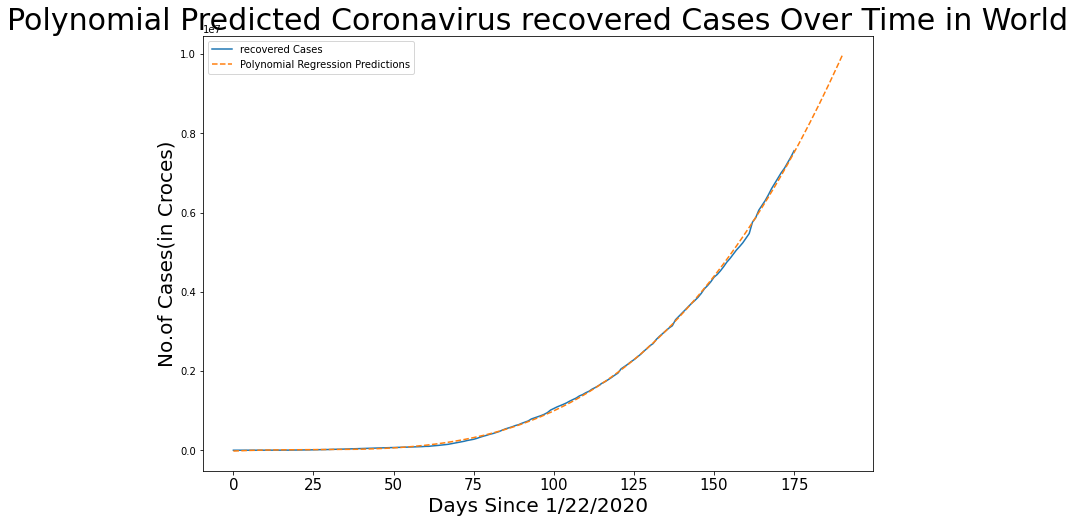

In [ ]:
#Graph for Polynomial Predicted recovered Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_recovered)
plt.plot(prediction_days,pol_world_recovered_days,linestyle='dashed')
plt.title('Polynomial Predicted Coronavirus recovered Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['recovered Cases', 'Polynomial Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
pol_world_recovered_days = pol_world_recovered_days.reshape(1,-1)[0]
df_world_recovered_poly_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Polynomial Regression Predicted # of recovered Cases Worldwide': np.round(pol_world_recovered_days[-(days_in_future):])})
df_world_recovered_poly_predict

,Date,Polynomial Regression Predicted # of recovered Cases Worldwide
0,07/16/2020,7661455.0
1,07/17/2020,7812321.0
2,07/18/2020,7965162.0
3,07/19/2020,8119989.0
4,07/20/2020,8276816.0
5,07/21/2020,8435656.0
6,07/22/2020,8596521.0
7,07/23/2020,8759424.0
8,07/24/2020,8924378.0
9,07/25/2020,9091396.0


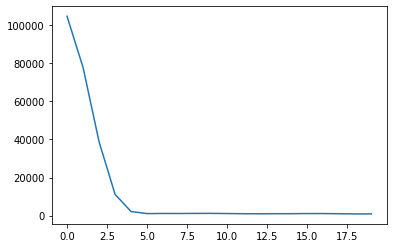

In [ ]:
#India

error_recovered=[]
for i in range(0,20):
  pol=PolynomialFeatures(degree=i)
  pol_ind_recovered=pol.fit_transform(xtrain_ind_recovered)
  pol_ind_recovered_test=pol.fit_transform(xtest_ind_recovered)
  lmodel=LinearRegression()
  lmodel.fit(pol_ind_recovered,ytrain_ind_recovered)
  pol_ind_recovered_predict=lmodel.predict(pol_ind_recovered_test)
  e=metrics.mean_absolute_error(pol_ind_recovered_predict,ytest_ind_recovered)
  error_recovered.append(e)
plt.plot(range(0,20),error_recovered)
plt.show()

In [ ]:
#Best Degree = 4

pol=PolynomialFeatures(degree=4)
pol_ind_recovered=pol.fit_transform(xtrain_ind_recovered)
pol_ind_recovered_test=pol.fit_transform(xtest_ind_recovered)
pol_ind_recovered_predict_days=pol.fit_transform(prediction_days)
pmodel=LinearRegression()
pmodel.fit(pol_ind_recovered,ytrain_ind_recovered)
pol_ind_recovered_predict=pmodel.predict(pol_ind_recovered_test)
pol_ind_recovered_days=pmodel.predict(pol_ind_recovered_predict_days)
print('MAE:', metrics.mean_absolute_error(pol_ind_recovered_predict, ytest_ind_recovered))
print('MSE:',metrics.mean_squared_error(pol_ind_recovered_predict,ytest_ind_recovered))
print('R2 :',metrics.r2_score(pol_ind_recovered_predict,ytest_ind_recovered))
print('Training score:',pmodel.score(pol_ind_recovered,ytrain_ind_recovered))
print('Testing score:',pmodel.score(pol_ind_recovered_test,ytest_ind_recovered))
print('Co-efficient:',pmodel.coef_)
print('Intercept:',pmodel.intercept_)

MAE: 2154.63982583214
MSE: 8047939.809268899
R2 : 0.9996097664376724
Training score: 0.9996797256193011
Testing score: 0.9996080928395823
Co-efficient: [[ 0.00000000e+00 -1.12661918e+03  4.51337339e+01 -6.39402622e-01
   3.03377883e-03]]
Intercept: [6172.83086823]


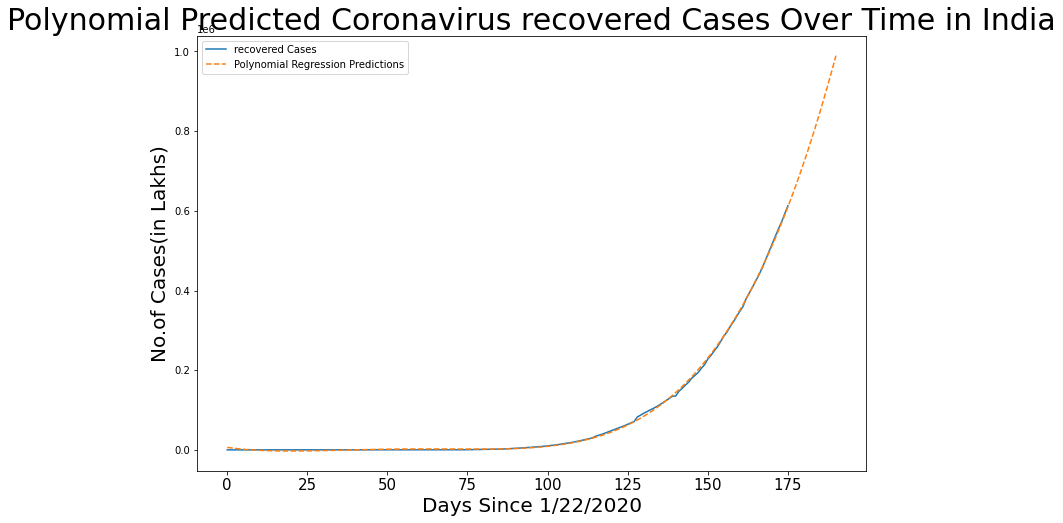

In [ ]:
#Graph for Polynomial Predicted recovered Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_recovered)
plt.plot(prediction_days,pol_ind_recovered_days,linestyle='dashed')
plt.title('Polynomial Predicted Coronavirus recovered Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Lakhs)', size=20)
plt.legend(['recovered Cases', 'Polynomial Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
pol_ind_recovered_days = pol_ind_recovered_days.reshape(1,-1)[0]
df_ind_recovered_poly_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Polynomial Regression Predicted # of recovered Cases India': np.round(pol_ind_recovered_days[-(days_in_future):])})
df_ind_recovered_poly_predict

,Date,Polynomial Regression Predicted # of recovered Cases India
0,07/16/2020,631019.0
1,07/17/2020,652792.0
2,07/18/2020,675117.0
3,07/19/2020,698002.0
4,07/20/2020,721458.0
5,07/21/2020,745493.0
6,07/22/2020,770116.0
7,07/23/2020,795337.0
8,07/24/2020,821166.0
9,07/25/2020,847611.0


In [ ]:
#Bayesian Ridge

In [ ]:
#To get Best Parameters

reg_world_confirm=BayesianRidge()
reg_world_confirm.fit(xtrain_world_recovered,ytrain_world_recovered)
print(reg_world_confirm.get_params)

<bound method BaseEstimator.get_params of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#World

reg_world_recovered=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
reg_world_recovered.fit(xtrain_world_recovered,ytrain_world_recovered)
reg_world_recovered_test = reg_world_recovered.predict(xtest_world_recovered)
reg_world_recovered_predict_days = reg_world_recovered.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(reg_world_recovered_test, ytest_world_recovered))
print('MSE:',metrics.mean_squared_error(reg_world_recovered_test, ytest_world_recovered))
print('R2 :',metrics.r2_score(reg_world_recovered_test, ytest_world_recovered))
print('Training score:',reg_world_recovered.score(xtrain_world_recovered,ytrain_world_recovered))
print('Testing score:',reg_world_recovered.score(xtest_world_recovered,ytest_world_recovered))

MAE: 757595.0825718342
MSE: 833875193190.1747
R2 : 0.7721571275366258
Training score: 0.7728566517124282
Testing score: 0.8027984900677956


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


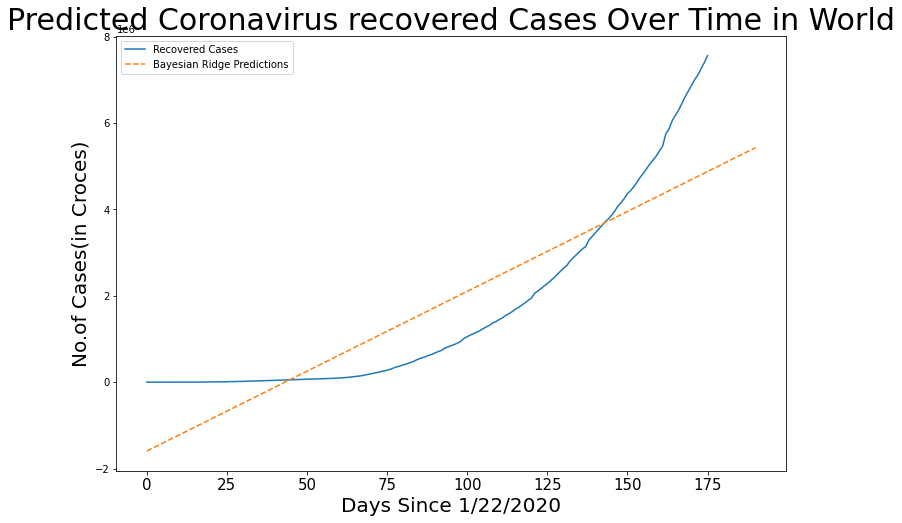

In [ ]:
#Graph for Bayesian Predicted recovered Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_recovered)
plt.plot(prediction_days,reg_world_recovered_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus recovered Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Recovered Cases', 'Bayesian Ridge Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
reg_world_recovered_predict_days = reg_world_recovered_predict_days.reshape(1,-1)[0]
df_world_recovered_reg_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Bayesian Ridge Predicted # of recovered Cases Worldwide': np.round(reg_world_recovered_predict_days[-(days_in_future):])})
df_world_recovered_reg_predict

,Date,Bayesian Ridge Predicted # of recovered Cases Worldwide
0,07/16/2020,4913804.0
1,07/17/2020,4950781.0
2,07/18/2020,4987758.0
3,07/19/2020,5024735.0
4,07/20/2020,5061711.0
5,07/21/2020,5098688.0
6,07/22/2020,5135665.0
7,07/23/2020,5172641.0
8,07/24/2020,5209618.0
9,07/25/2020,5246595.0


In [ ]:
#To get Parameters

reg_ind_recover=BayesianRidge()
reg_ind_recover.fit(xtrain_ind_recovered,ytrain_ind_recovered)
print(reg_ind_recover.get_params)

<bound method BaseEstimator.get_params of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#India

reg_ind_recovered=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
reg_ind_recovered.fit(xtrain_ind_recovered,ytrain_ind_recovered)
reg_ind_recovered_test = reg_ind_recovered.predict(xtest_ind_recovered)
reg_ind_recovered_predict_days = reg_ind_recovered.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(reg_ind_recovered_test, ytest_ind_recovered))
print('MSE:',metrics.mean_squared_error(reg_ind_recovered_test, ytest_ind_recovered))
print('R2 :',metrics.r2_score(reg_ind_recovered_test, ytest_ind_recovered))
print('Training score:',reg_ind_recovered.score(xtrain_ind_recovered,ytrain_ind_recovered))
print('Testing score:',reg_ind_recovered.score(xtest_ind_recovered,ytest_ind_recovered))

MAE: 77502.27238970147
MSE: 9115729191.118227
R2 : 0.2070662053052248
Training score: 0.5739261561040466
Testing score: 0.5560951464482611


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


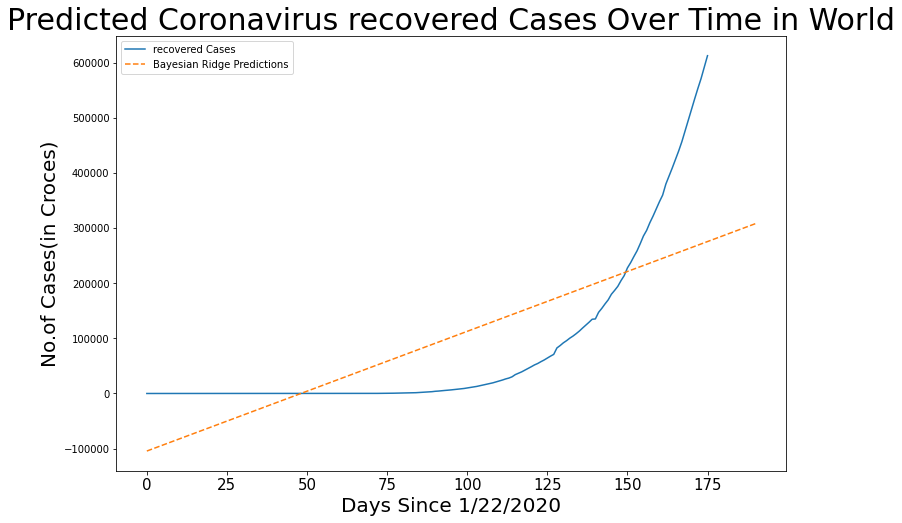

In [ ]:
#Graph for Bayesian Predicted recovered Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_recovered)
plt.plot(prediction_days,reg_ind_recovered_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus recovered Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['recovered Cases', 'Bayesian Ridge Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
reg_ind_recovered_predict_days = reg_ind_recovered_predict_days.reshape(1,-1)[0]
df_ind_recovered_reg_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Bayesian Ridge Predicted # of recovered Cases India': np.round(reg_ind_recovered_predict_days[-(days_in_future):])})
df_ind_recovered_reg_predict

,Date,Bayesian Ridge Predicted # of recovered Cases India
0,07/16/2020,277771.0
1,07/17/2020,279942.0
2,07/18/2020,282113.0
3,07/19/2020,284285.0
4,07/20/2020,286456.0
5,07/21/2020,288628.0
6,07/22/2020,290799.0
7,07/23/2020,292970.0
8,07/24/2020,295142.0
9,07/25/2020,297313.0


In [ ]:
#SVR

In [ ]:
#World

svm_world_recovered = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_world_recovered.fit(xtrain_world_recovered, ytrain_world_recovered)
svm_world_recovered_predict = svm_world_recovered.predict(xtest_world_recovered)
svm_world_recovered_predict_days=svm_world_recovered.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(svm_world_recovered_predict, ytest_world_recovered))
print('MSE:',metrics.mean_squared_error(svm_world_recovered_predict, ytest_world_recovered))
print('R2 :',metrics.r2_score(svm_world_recovered_predict, ytest_world_recovered))
print('Training score:',svm_world_recovered.score(xtrain_world_recovered,ytrain_world_recovered))
print('Testing score:',svm_world_recovered.score(xtest_world_recovered,ytest_world_recovered))

MAE: 129221.90828988649
MSE: 25925456940.596165
R2 : 0.9937099065457649
Training score: 0.993026517425328
Testing score: 0.9938689395054328


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


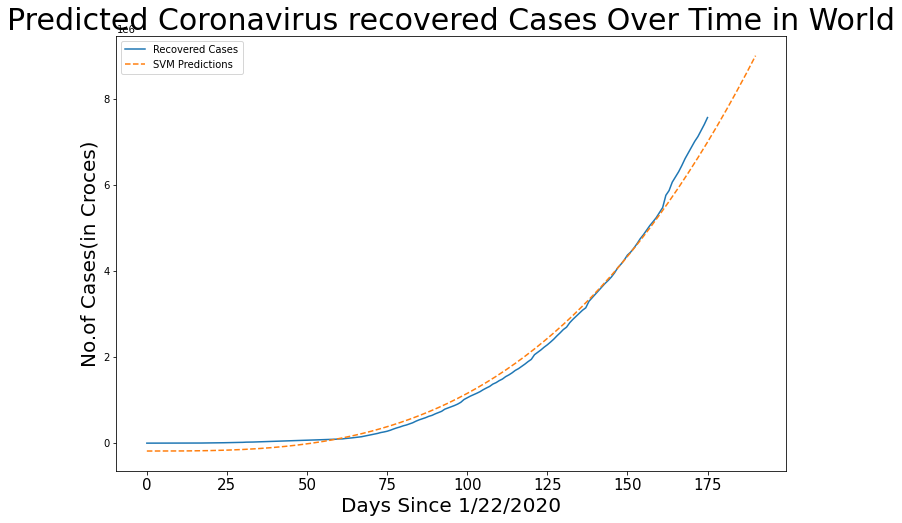

In [ ]:
#Graph for SVM Predicted recovered Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_recovered)
plt.plot(prediction_days,svm_world_recovered_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus recovered Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Recovered Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
svm_world_recovered_predict_days = svm_world_recovered_predict_days.reshape(1,-1)[0]
df_world_recovered_svm_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'SVM Predicted # of recovered Cases Worldwide': np.round(svm_world_recovered_predict_days[-(days_in_future):])})
df_world_recovered_svm_predict

,Date,SVM Predicted # of recovered Cases Worldwide
0,07/16/2020,7112574.0
1,07/17/2020,7237641.0
2,07/18/2020,7364129.0
3,07/19/2020,7492047.0
4,07/20/2020,7621402.0
5,07/21/2020,7752203.0
6,07/22/2020,7884456.0
7,07/23/2020,8018171.0
8,07/24/2020,8153356.0
9,07/25/2020,8290017.0


In [ ]:
#India

svm_ind_recovered = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_ind_recovered.fit(xtrain_ind_recovered, ytrain_ind_recovered)
svm_ind_recovered_predict = svm_ind_recovered.predict(xtest_ind_recovered)
svm_ind_recovered_predict_days=svm_ind_recovered.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(svm_ind_recovered_predict, ytest_ind_recovered))
print('MSE:',metrics.mean_squared_error(svm_ind_recovered_predict, ytest_ind_recovered))
print('R2 :',metrics.r2_score(svm_ind_recovered_predict, ytest_ind_recovered))
print('Training score:',reg_ind_recovered.score(xtrain_ind_recovered,ytrain_ind_recovered))
print('Testing score:',reg_ind_recovered.score(xtest_ind_recovered,ytest_ind_recovered))

MAE: 39822.52673538467
MSE: 3106024753.725635
R2 : 0.7460836346915979
Training score: 0.5739261561040466
Testing score: 0.5560951464482611


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


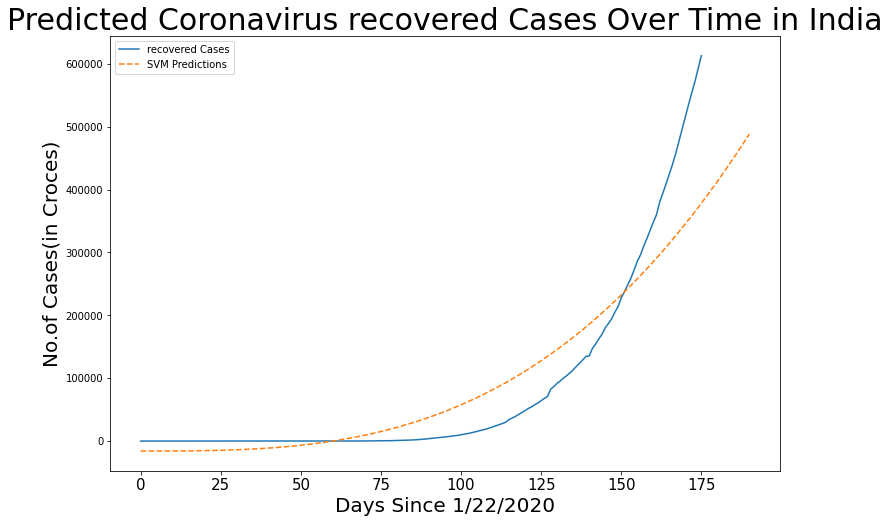

In [ ]:
#Graph for SVM Predicted recovered Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_recovered)
plt.plot(prediction_days,svm_ind_recovered_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus recovered Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['recovered Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
svm_ind_recovered_predict_days = svm_ind_recovered_predict_days.reshape(1,-1)[0]
df_ind_recovered_svm1_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'SVM Predicted # of recovered Cases India': np.round(svm_ind_recovered_predict_days[-(days_in_future):])})
df_ind_recovered_svm1_predict

,Date,SVM Predicted # of recovered Cases India
0,07/16/2020,384835.0
1,07/17/2020,391704.0
2,07/18/2020,398650.0
3,07/19/2020,405676.0
4,07/20/2020,412780.0
5,07/21/2020,419963.0
6,07/22/2020,427227.0
7,07/23/2020,434570.0
8,07/24/2020,441995.0
9,07/25/2020,449500.0


**Recovery Rate**

In [ ]:
#Confirmed Cases in World and India

world_covid_confirmed=pd.read_csv('/content/time_series_covid19_confirmed_global1.csv')
world_covid_confirmed.drop(columns=['Province/State','Lat','Long'],inplace=True)
India_covid_confirmed=world_covid_confirmed[world_covid_confirmed['Country/Region']=='India']
print(India_covid_confirmed)
world_covid_confirmed

    Country/Region  1/22/20  1/23/20  ...  7/13/20  7/14/20  7/15/20
131          India        0        0  ...   906752   936181   968857

[1 rows x 177 columns]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727,727,729,732,732,737
262,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516,1526
263,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314,317,317,317,321,321
264,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506,6552,6596,6643,6695


In [ ]:
#Access all No.of Confirmed Cases daily in World

world_confirmed=[]
cov_confirmed=world_covid_confirmed.values
for i in range(1,len(cols)+1):
  world_confirmed.append(cov_confirmed[:,i].sum())
world_confirmed=np.array(world_confirmed).reshape(-1,1)
world_confirmed

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78979],
       [   79543],
       [   80396],
       [   81373],
       [   82737],
       [   84114],
       [   86009],
       [   88386],
       [   90360],
       [   92938],
       [   95237],
       [   98028],
       [  101971],
       [  106009],
       [  109960],
       [  113860],
       [  118884],
       [  126547],
       [  132297],
       [  146704],
       [  15

In [ ]:
#Access all Confirmed Cases Daily in India

India_confirmed=[]
ind_confirmed=world_covid_confirmed[world_covid_confirmed['Country/Region']=='India'].values
for i in range(1,len(cols)+1):
  India_confirmed.append(ind_confirmed[:,i].sum())
India_confirmed=np.array(India_confirmed).reshape(-1,1)
India_confirmed

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     1],
       [     2],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     5],
       [     5],
       [    28],
       [    30],
       [    31],
       [    34],
       [    39],
       [    43],
       [    56],
       [    62],
       [    73],
       [    82],
       [   102],
       [   113],
       [   119],
       [   142],
       [   156],
       [   194],
       [   244

In [ ]:
# World

In [ ]:
recovery_rate_world=[]
cov_confirm=world_covid_confirmed.values
cov_recover=world_covid_recovered.values
for i in range(1,len(days)+1):
  confirm=cov_confirm[:,i].sum()
  recover=cov_recover[:,i].sum()
  recovery_rate_world.append((recover/confirm)*100)
recovery_rate_world

[5.045045045045045,
 4.587155963302752,
 3.825717321997875,
 2.7196652719665275,
 2.4551463644948064,
 2.0840450973693203,
 1.9182502689135892,
 2.0434641582873825,
 1.7367014816614041,
 2.23632517376851,
 2.3591958797142385,
 2.8116995293977483,
 3.132699753607884,
 3.565151895556114,
 4.066128857215208,
 4.82760859684436,
 5.846780055240587,
 7.045705513210699,
 8.077890385716776,
 9.226524504302281,
 10.450792233876367,
 11.386751569824002,
 10.42546496414435,
 12.04340288156872,
 13.606082548877623,
 15.252547940590166,
 17.173702384364464,
 19.09755026546553,
 21.30969848382705,
 23.850887667134664,
 24.583550234252993,
 29.11667790486126,
 29.620532040162573,
 31.71492148900595,
 34.70943828051147,
 37.33916655401669,
 40.22021586472799,
 43.64433982452386,
 46.253299073352785,
 48.32892086982101,
 50.46702080566623,
 51.89265962254406,
 53.72911788485567,
 54.87819806585873,
 54.785184022908474,
 55.05098623701761,
 55.1964350672972,
 54.88582469699631,
 54.173816493388514,
 52.

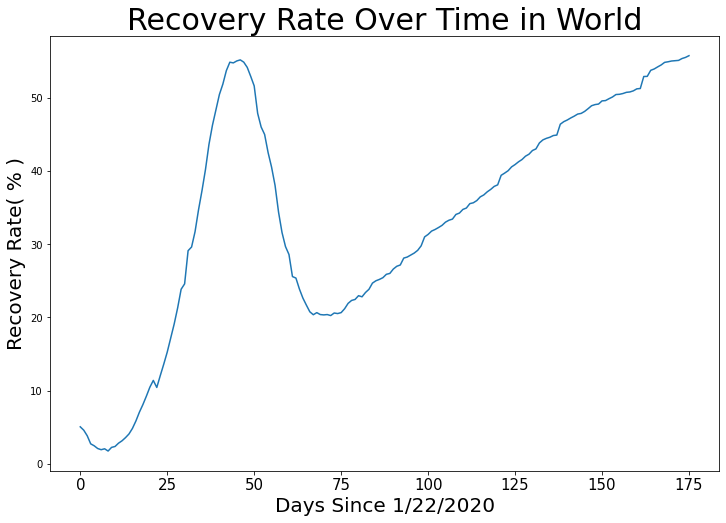

In [ ]:
#Graph for Recovery Rate in World

plt.figure(figsize=(12, 8))
plt.plot(days,recovery_rate_world)
plt.title('Recovery Rate Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Recovery Rate( % )', size=20)
plt.xticks(size=15)
plt.show()

In [ ]:
# India

In [ ]:
recovery_rate_india=[]
cov_confirm=India_covid_confirmed.values
cov_recover=India_covid_recovered.values
for i in range(1,len(days)+1):
  confirm=cov_confirm[:,i].sum()
  recover=cov_recover[:,i].sum()
  if(confirm != 0 ):
    recovery_rate_india.append((recover/confirm)*100)
  else:
    recovery_rate_india.append(0)
recovery_rate_india

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 60.0,
 60.0,
 10.714285714285714,
 10.0,
 9.67741935483871,
 8.823529411764707,
 7.6923076923076925,
 6.976744186046512,
 7.142857142857142,
 6.451612903225806,
 5.47945205479452,
 4.878048780487805,
 3.9215686274509802,
 11.504424778761061,
 10.92436974789916,
 9.859154929577464,
 8.974358974358974,
 7.731958762886598,
 8.19672131147541,
 6.969696969696971,
 6.8181818181818175,
 5.410821643286573,
 7.462686567164178,
 6.54490106544901,
 6.189821182943604,
 8.229988726042842,
 8.51063829787234,
 9.27734375,
 8.15347721822542,
 8.804581245526128,
 7.4074074074074066,
 7.510813999213527,
 7.479548110634983,
 7.430240103828682,
 6.382385730211817,
 7.848472164085392,
 7.926944078327998,
 8.553076402974984,
 9.219330855018587,
 10.18689128

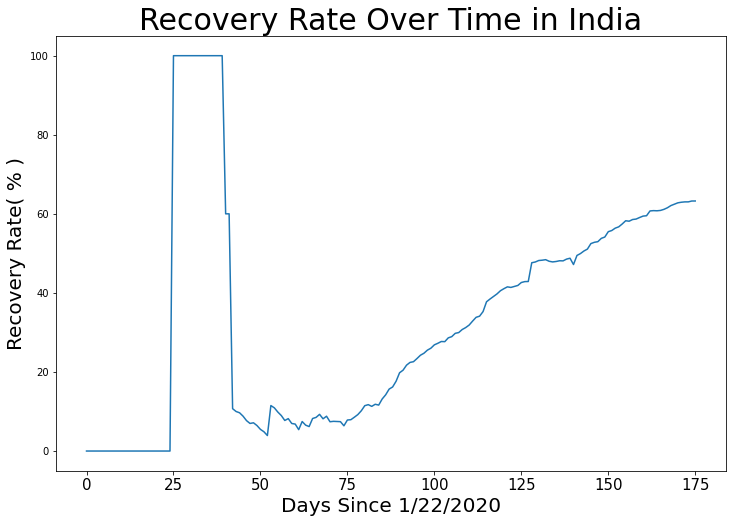

In [ ]:
#Graph for Recovery Rate in India

plt.figure(figsize=(12, 8))
plt.plot(days,recovery_rate_india)
plt.title('Recovery Rate Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Recovery Rate( % )', size=20)
plt.xticks(size=15)
plt.show()